In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)


import gc
from datetime import datetime 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import KFold

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score


In [151]:
creditC = pd.read_csv('creditcard.csv')

In [152]:
creditC.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [153]:
creditC.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [154]:
#284807 Transactions

In [155]:
temp = creditC["Class"].value_counts()
temp1 = pd.DataFrame({'Class': temp.index,'values': temp.values})

trace = go.Bar( x = temp1['Class'],y = temp1['values'], name="Credit Card Fraud Class ", marker=dict(color="Red"), text=temp1['values'])
data = [trace]
         
fig = dict(data=data, layout=layout)
iplot(fig, filename='class')

In [156]:
#492 transcations are fraudulent which is 0.172% of all transactions.

In [157]:
class0 = creditC.loc[creditC['Class'] == 0]["Time"]
class1 = creditC.loc[creditC['Class'] == 1]["Time"]

hist_data = [class0, class1]
group_labels = ['Not Fraud', 'Fraud']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig['layout'].update(title='Credit Card Transactions Time Density Plot', xaxis=dict(title='Time [s]'))
iplot(fig, filename='dist_only')

The time density plot shows us that the fraud attempts were more consistent than the normal transactions, making a relationship with Time and the Fraud transactions.

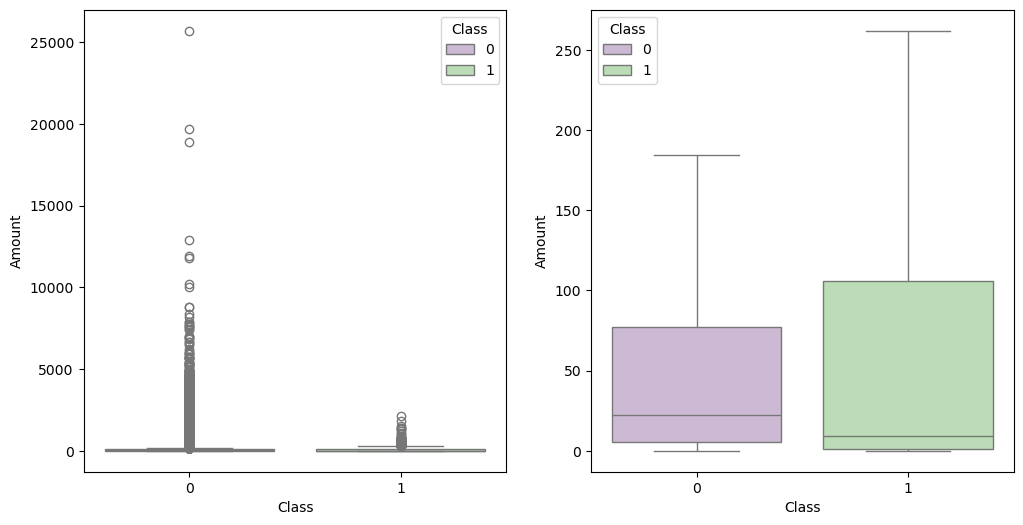

In [159]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=creditC, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=creditC, palette="PRGn",showfliers=False)
plt.show();

We can see the Fraud Transactions amounts always stayed less than normal transactions and always below a certain threshold, and concentrating at certain points

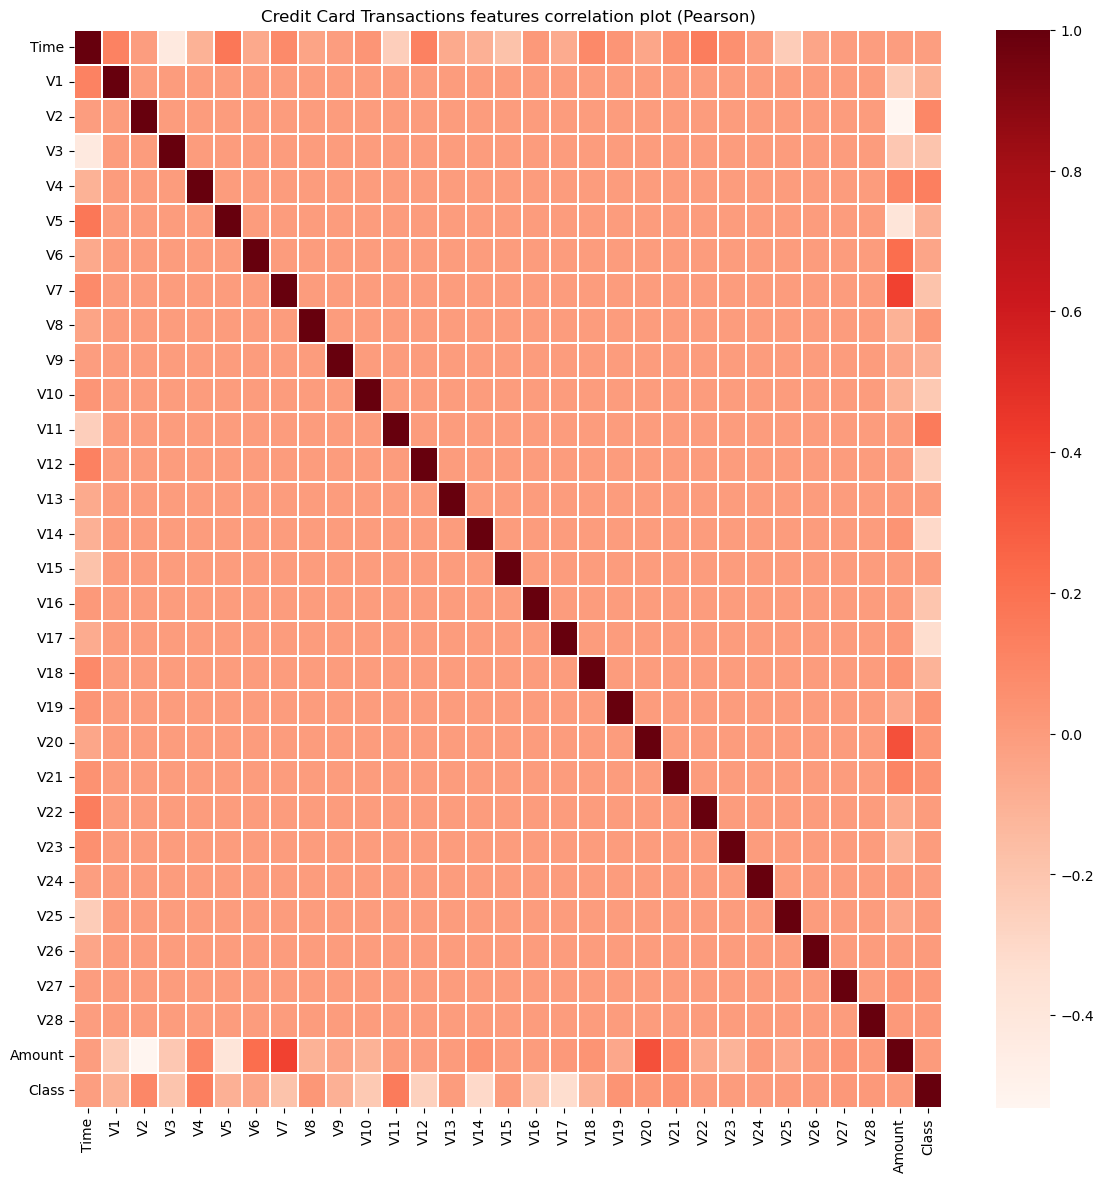

In [161]:
plt.figure(figsize = (14,14))
plt.title('Credit Card Transactions features correlation plot (Pearson)')
corr = creditC.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()

In [162]:
#No significant correlation between Vs 

In [163]:
#Using RandomForestClassifier as a predictive Model


In [164]:
target = 'Class'
predictors = ['Time', 'V1', 'V2' , 'V3', 'V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20', 'V21','V22','V23','V24','V25','V26','V27','V28','Amount']

In [165]:
#splitting the data into train, test and validation sets.


In [166]:
RFC_METRIC = 'gini'
NUM_ESTIMATORS = 100
NO_JOBS = 4 
VALID_SIZE = 0.20
TEST_SIZE = 0.20
NUMBER_KFOLDS = 5
RANDOM_STATE = 2018
MAX_ROUNDS = 1000
EARLY_STOP = 50
OPT_ROUNDS = 1000
VERBOSE_EVAL = 50 

In [167]:
train, test = train_test_split(creditC, test_size=TEST_SIZE, random_state = RANDOM_STATE, shuffle = True)
train, valid = train_test_split(train, test_size = VALID_SIZE,random_state = RANDOM_STATE, shuffle = True)

In [168]:
PM = RandomForestClassifier(n_jobs = NO_JOBS, random_state = RANDOM_STATE, criterion = RFC_METRIC, n_estimators = NUM_ESTIMATORS, verbose = False)


In [169]:
PM.fit(train[predictors], train[target].values)

RandomForestClassifier(n_jobs=4, random_state=2018, verbose=False)

C:\Users\yashd\AppData\Local\Temp\ipykernel_13744\271274369.py:8: UserWarning:

FixedFormatter should only be used together with FixedLocator



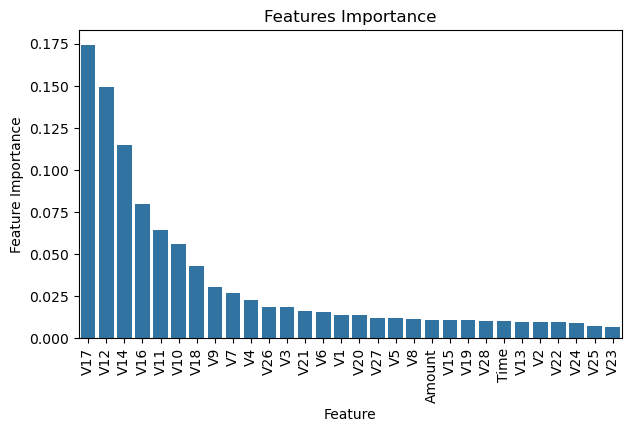

In [170]:
#Checking which Feature has the most importance
predi = PM.predict(valid[predictors])
tmp1 = pd.DataFrame({'Feature': predictors, 'Feature Importance':PM.feature_importances_})
tmp1 = tmp1.sort_values(by= 'Feature Importance', ascending = False)
plt.figure(figsize = (7,4))
plt.title('Features Importance')
s = sns.barplot(x='Feature', y = 'Feature Importance', data=tmp1)
s.set_xticklabels(s.get_xticklabels(),rotation = 90)
plt.show()

Here we can obsevrve that while using the RandomForestClassifier method 'V17', 'V12' and 'V14' were the most important features that distinguished the fraud transactions and were the key feature, while using this method.

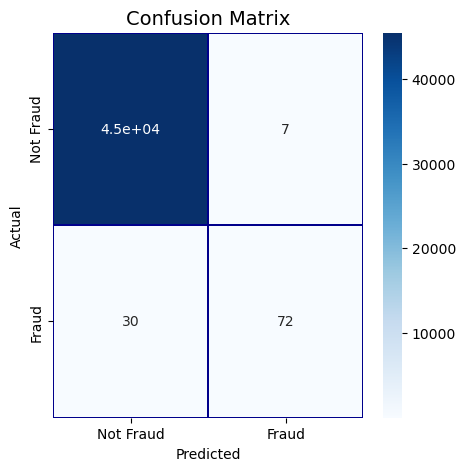

In [171]:
CM = pd.crosstab(valid[target].values, predi, rownames = ['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols = 1, figsize = (5,5))
sns.heatmap(CM, xticklabels = ['Not Fraud', 'Fraud'], yticklabels = ['Not Fraud', 'Fraud'], annot = True, ax=ax1, linewidths = .2, linecolor = 'Darkblue', cmap = 'Blues')
plt.title('Confusion Matrix', fontsize = 14)
plt.show()

In [180]:
#Precision
precision = precision_score(valid[target], predi)
print(precision)

0.9113924050632911


In [182]:
#Recall
recall = recall_score(valid[target], predi)
print(recall)

0.7058823529411765


In [184]:
#F1-score
F1 = f1_score(valid[target], predi)
print(F1)

0.7955801104972375


In [173]:
roc_auc_score(valid[target].values, predi)

0.8528641975628091

This analysis can help detect the fraudulent credit card attempts by accuracy of 0.85